# Azure AI Foundry o4-mini on images examples

<img src="https://www.cometapi.com/wp-content/uploads/2025/04/OpenAI-o4-mini-website-1024x576.webp" width=500>

We are excited to announce the general availability of the o3 and o4-mini models on Azure OpenAI Service. These models represent a significant step forward in AI capabilities, offering advanced reasoning and analysis for various applications.

- o3 Model: The o3 model is the most advanced reasoning model available on Azure OpenAI Service. It excels in complex problem-solving and multi-faceted analysis, making it ideal for tasks involving coding, math, science, and visual perception. It integrates various tools, including web browsing, Python code execution, image processing, and image generation 6. Additionally, it makes 20% fewer major errors compared to previous models on difficult, real-world tasks.

- o4-mini Model: The o4-mini model is a smaller, optimized version designed for fast, cost-efficient reasoning. It offers a competitive trade-off between price, speed, and performance, making it suitable for high-volume, high-throughput applications. It achieves high performance in math and coding task and performs well in visual tasks, including analyzing images and diagrams.

> https://azure.microsoft.com/en-us/blog/o3-and-o4-mini-unlock-enterprise-agent-workflows-with-next-level-reasoning-ai-with-azure-ai-foundry-and-github/?msockid=2e39c66c693c66a5151fd200687567d0

> https://openai.com/index/introducing-o3-and-o4-mini/

o4-mini:
- Context: 200K
- Max Output: 100K

In [1]:
import base64
import os
import requests
import sys
import time

from datetime import datetime
from dotenv import load_dotenv
from io import BytesIO
from openai import AzureOpenAI
from PIL import Image

In [2]:
import sys

In [3]:
print(f"Today is {datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 18-Apr-2025 13:02:30


In [4]:
load_dotenv("azure.env")

endpoint = os.getenv('AZURE_OPENAI_ENDPOINT')
key = os.getenv('AZURE_OPENAI_API_KEY')

deployment_name = "o4-mini"  # As deployed in Azure AI Foundry
api_version = "2025-01-01-preview"  # Subject to change. Check: https://learn.microsoft.com/en-us/azure/ai-services/openai/how-to/reasoning?tabs=python-secure#api--feature-support

## url images

In [5]:
def o1_imageurl(prompt, image_url, effort='low'):
    """
    Generates a response from Azure OpenAI o1 using a text prompt and an image URL.

    Args:
        prompt (str): The text prompt to be sent to the AI model.
        imageurl (str): The URL of the image to be included in the request.
        effort (str, optional): The reasoning effort level for the AI model. Defaults to 'low'.

    Returns:
        str: The content of the AI model's response.
    """
    # client
    client = AzureOpenAI(
        api_key=key,
        api_version=api_version,
        base_url=f"{endpoint}/openai/deployments/{deployment_name}")

    # Results
    response = client.chat.completions.create(
        model=deployment_name,
        messages=[
            {
                "role": "system",
                "content": "You are an AI helpful assistant."
            },
            {
                "role":
                "user",
                "content": [{
                    "type": "text",
                    "text": prompt,
                }, {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url,
                    },
                }]
            },
        ],
        reasoning_effort=effort,  # low, medium or high
    )

    return response.choices[0].message.content

In [6]:
def o1_imagefile(prompt, image_file, effort='low'):
    """
    Generates a response from Azure OpenAI o1 using a text prompt and a local image file.

    Args:
        prompt (str): The text prompt to be sent to the AI model.
        image_path (str): The file path to the local image to be included in the request.
        effort (str, optional): The reasoning effort level for the AI model. Defaults to 'low'.

    Returns:
        str: The content of the AI model's response.
    """
    # Transforming local image to base64
    with open(image_file, "rb") as image_file:
        base64_image = base64.b64encode(image_file.read()).decode('utf-8')

    # link to base64
    image_uri = f"data:image/jpeg;base64,{base64_image}"

    # client
    client = AzureOpenAI(
        api_key=key,
        api_version=api_version,
        base_url=f"{endpoint}/openai/deployments/{deployment_name}")

    # Results
    response = client.chat.completions.create(
        model=deployment_name,
        messages=[
            {
                "role": "system",
                "content": "You are an AI helpful assistant."
            },
            {
                "role":
                "user",
                "content": [{
                    "type": "text",
                    "text": prompt,
                }, {
                    "type": "image_url",
                    "image_url": {
                        "url": image_uri,
                    },
                }]
            },
        ],
        reasoning_effort=effort,  # low, medium or high
    )

    return response.choices[0].message.content

## Examples

In [7]:
prompt = "What are the car model and color?"

imageurl = "https://www.electrive.com/media/2024/02/renault-5-r5-2024-28-min-1400x933.jpg"

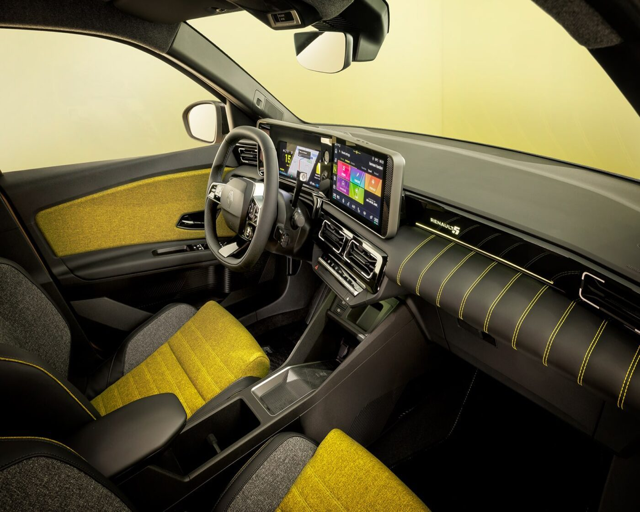

In [8]:
img = Image.open(BytesIO(requests.get(imageurl).content)).resize((640, 512))
img

In [9]:
start = time.time()

resp = o1_imageurl(prompt, imageurl, effort="low")
print("\033[1;31;34m")
print(resp)

elapsed = time.time() - start
minutes, seconds = divmod(elapsed, 60)
print(f"\nElapsed time = {minutes:.0f} minutes and {seconds:.0f} seconds")


This is the interior of the new Renault 5 EV concept, finished in a black‐and‐yellow color scheme.

Elapsed time = 0 minutes and 25 seconds


## Local image file

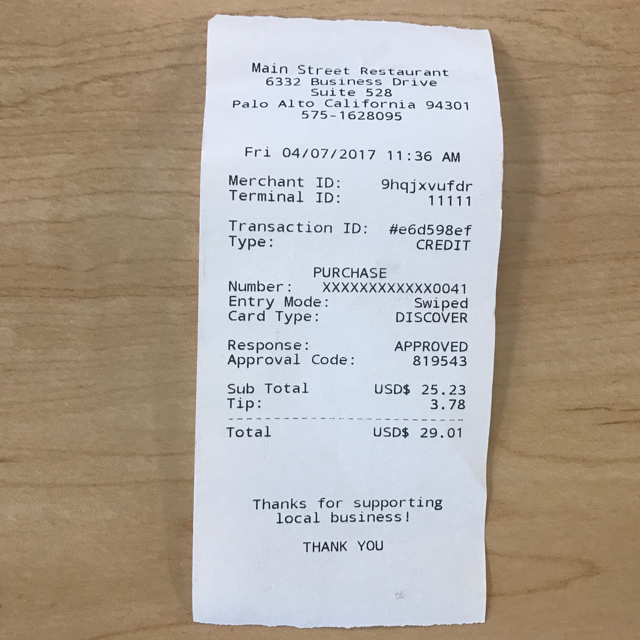

In [10]:
image_path = "receipt.jpg"

img = Image.open(image_path).resize((640,640))
img

In [11]:
prompt = "Extract all the text from this image"

resp = o1_imagefile(prompt, image_path, effort="low")
print("\033[1;31;34m")
print(resp)


Main Street Restaurant  
6332 Business Drive  
Suite 528  
Palo Alto California 94301  
575-1628095  

Fri 04/07/2017 11:36 AM  

Merchant ID:       9hqjxvufdr  
Terminal ID:       11111  

Transaction ID:    #e6d598ef  
Type:              CREDIT  

                   PURCHASE  
Number:            XXXXXXXXXXXX0041  
Entry Mode:        Swiped  
Card Type:         DISCOVER  

Response:          APPROVED  
Approval Code:     819543  

Sub Total          USD$ 25.23  
Tip:               3.78  
-------------------------  
Total              USD$ 29.01  


      Thanks for supporting  
         local business!  

             THANK YOU


In [12]:
prompt = "What is the date of this receipt?"

resp = o1_imagefile(prompt, image_path, effort="low")
print("\033[1;31;34m")
print(resp)


The receipt is dated Friday, April 7, 2017.


In [13]:
prompt = "What is the merchant?"

resp = o1_imagefile(prompt, image_path, effort="low")
print("\033[1;31;34m")
print(resp)


The merchant is “Main Street Restaurant.”


In [14]:
prompt = "What is the total paid? What is the tip amount?"

resp = o1_imagefile(prompt, image_path, effort="low")
print("\033[1;31;34m")
print(resp)


The tip was $3.78, and the total paid was $29.01.
